# Просторова обробка зображень: просторова фільтрація

У даній лабораторній роботі розглянуто наступні приклади просторової фільтрації:

1. Лінійні згладжувальні фільтри
2. Нелінійні згладжувальні фільтри
3. Фільтри на основі порядкових статистик

### Імпортуємо необхдіні пакети та бібліотеки

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Лінійні згладжувальні фільтри

Згладжувальні фільтри використовуються для попередньої обробки зображень - для подавлення або видалення шуму, видалення невеликих деталей, видалення розривів ліній. Для подавлення або видалення шуму використовуються як лінійні так і нелінійні згладжувальні фільтри. Для видалення невеликих деталей або видалення розривів використовуються лінійні згладжувальні фільтри.

Результатом використання лінійного згладжувального фільтра з розмірами NxN є середнє значення інтенсивності пікселів, що покриваються маскою фільтра. Заміна початкового значення інтенсивності пікселя на середнє значення дозволяє зменшити рівень випадкових перепадів значень інтенсивності, що є оптимальним для видалення випадкового шуму. Також усереднення по масці із заданими розмірами NxN дозволяє видаляти зайві деталі, що є меншими в порівнянні з розмірами маски фільтру.

Лінійні згладжувальні фільтри застосовуються у OpenCV за допомогою функцій **filter2D** або **blur**.

### Синтаксис функції
    retval = cv2.filter2D(src, ddepth, mask)
Параметри:
* **filename** - відносний або абсолютний шлях до файла із зображенням. Обовязковий параметр.<br>
* **flags** - даний параметр визначає формат зчитування зображення:<br>
    * cv2.IMREAD_COLOR - зчитування кольорового зображення;
    * cv2.IMREAD_GRAYSCALE - зчитування зображення у відтінках сірого;
    * cv2.IMREAD_UNCHANGED - зчитування зображення без змін при наявності альфа-каналу.


<h2>2D Convolution ( Image Filtering )</h2>

As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. LPF helps in removing noises, blurring the images etc. HPF filters helps in finding edges in the images.

OpenCV provides a function <b>cv2.filter2D()</b> to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:
           
\begin{equation*}
K =  \frac{1}{25} \begin{vmatrix}
1 & 1 & 1 & 1 & 1\\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1
\end{vmatrix}
\end{equation*}

Operation is like this: keep this kernel above a pixel, add all the 25 pixels below this kernel, take its average and replace the central pixel with the new average value. It continues this operation for all the pixels in the image. Try this code and check the result:

In [1]:
img = cv2.imread("./examples/Fig0333a.tiff", 0)

NameError: name 'cv2' is not defined

In [3]:
kernel3 = np.ones((3,3),np.float32)/9
dst3 = cv2.filter2D(img, -1, kernel3)

kernel5 = np.ones((5,5),np.float32)/25
dst5 = cv2.filter2D(img, -1, kernel5)

kernel9 = np.ones((9,9), np.float32)/81
dst9 = cv2.filter2D(img, -1, kernel9)

kernel15 = np.ones((15,15), np.float32)/225
dst15 = cv2.filter2D(img, -1, kernel15)

kernel35 = np.ones((35,35), np.float32)/1225
dst35 = cv2.filter2D(img, -1, kernel35)

<h3>Plot input sample image and averaging</h3>

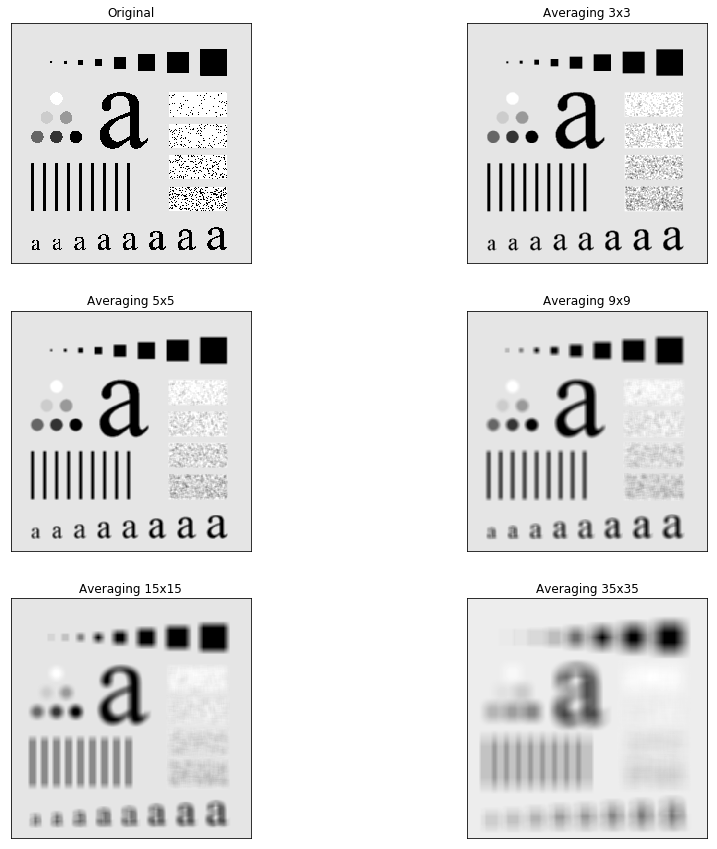

In [4]:
plt.figure(figsize=(15,15))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(dst3, cmap='gray'),plt.title('Averaging 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(dst5, cmap='gray'),plt.title('Averaging 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(dst9, cmap='gray'),plt.title('Averaging 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(dst15, cmap='gray'),plt.title('Averaging 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(dst35, cmap='gray'),plt.title('Averaging 35x35')
plt.xticks([]), plt.yticks([])
plt.show()

<h3>1. Averaging</h3>
This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element. This is done by the function <b>cv2.blur()</b> or <b>cv2.boxFilter()</b>. Check the docs for more details about the kernel. We should specify the width and height of kernel. A 3x3 normalized box filter would look like below:
K = 1/9 * ⎡ 1 1 1 ⎤
          ⎢ 1 1 1 ⎥
          ⎣ 1 1 1 ⎦


In [5]:
blur3 = cv2.blur(img, (3,3))
blur5 = cv2.blur(img, (5,5))
blur9 = cv2.blur(img, (9,9))
blur15 = cv2.blur(img, (15,15))
blur35 = cv2.blur(img, (35,35))

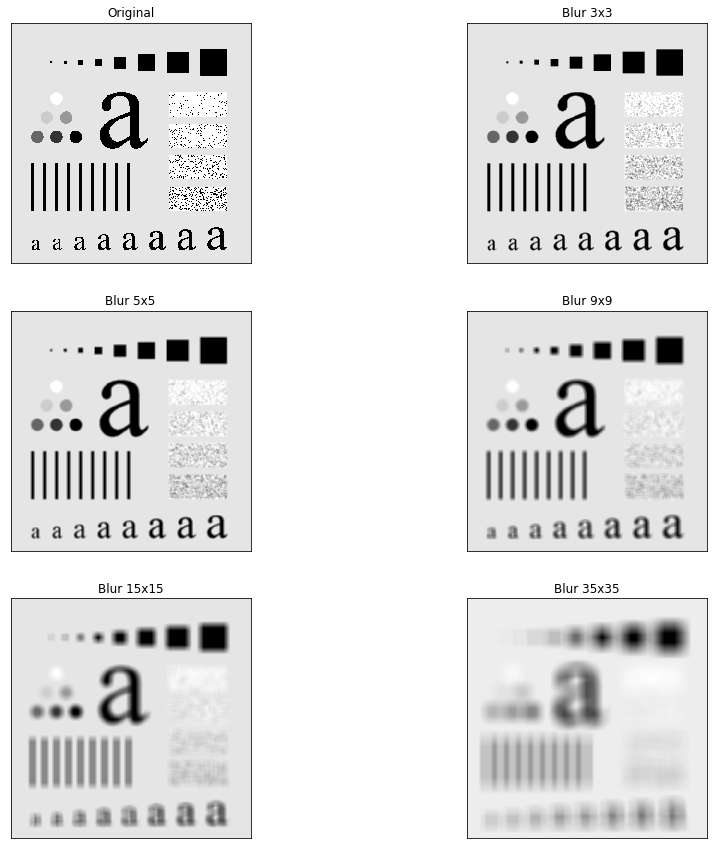

In [6]:
plt.figure(figsize=(15,15))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(blur3, cmap='gray'),plt.title('Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(blur5, cmap='gray'),plt.title('Blur 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(blur9, cmap='gray'),plt.title('Blur 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(blur15, cmap='gray'),plt.title('Blur 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(blur35, cmap='gray'),plt.title('Blur 35x35')
plt.xticks([]), plt.yticks([])
plt.show()

<h3>2. Gaussian Blurring</h3>
In this, instead of box filter, gaussian kernel is used. It is done with the function, <b>cv2.GaussianBlur()</b>. We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, <b>cv2.getGaussianKernel()</b>.

The above code can be modified for Gaussian blurring:

In [7]:
gblur3 = cv2.GaussianBlur(img,(3,3),0)
gblur5 = cv2.GaussianBlur(img,(5,5),0)
gblur9 = cv2.GaussianBlur(img,(9,9),0)
gblur15 = cv2.GaussianBlur(img,(15,15),0)
gblur35 = cv2.GaussianBlur(img,(35,35),0)

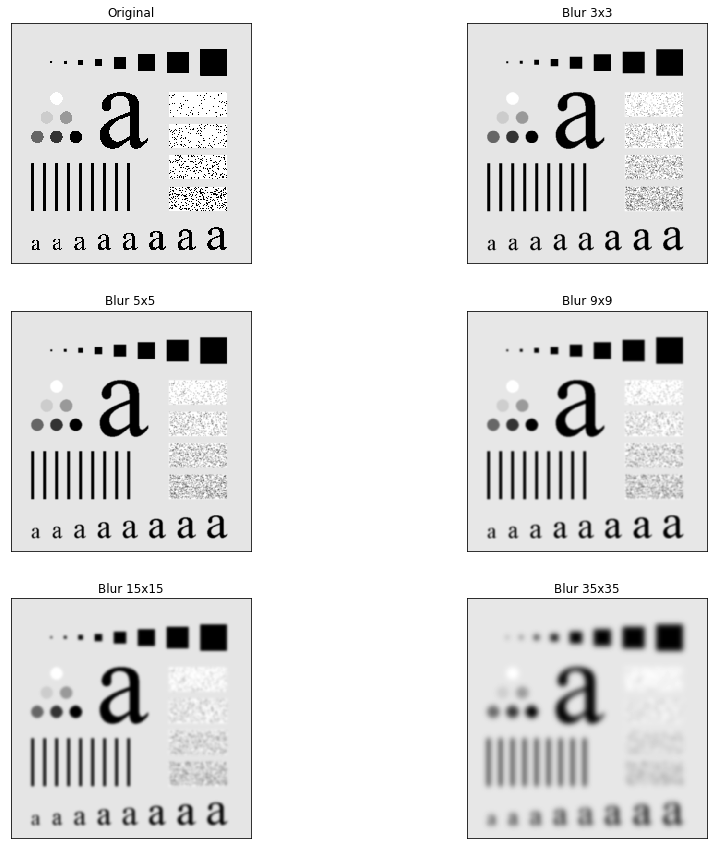

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(321),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(gblur3, cmap='gray'),plt.title('Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(323),plt.imshow(gblur5, cmap='gray'),plt.title('Blur 5x5')
plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(gblur9, cmap='gray'),plt.title('Blur 9x9')
plt.xticks([]), plt.yticks([])
plt.subplot(325),plt.imshow(gblur15, cmap='gray'),plt.title('Blur 15x15')
plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(gblur35, cmap='gray'),plt.title('Blur 35x35')
plt.xticks([]), plt.yticks([])
plt.show()

## Фільтри на основі порядкових статистик

<h3>3. Median Blurring</h3>
Here, the function <b>cv2.medianBlur()</b> takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a positive odd integer.

In [9]:
img = cv2.imread('./examples/Fig0335a.tiff')

In [10]:
blur3 = cv2.blur(img, (3,3))
median3 = cv2.medianBlur(img, 3)

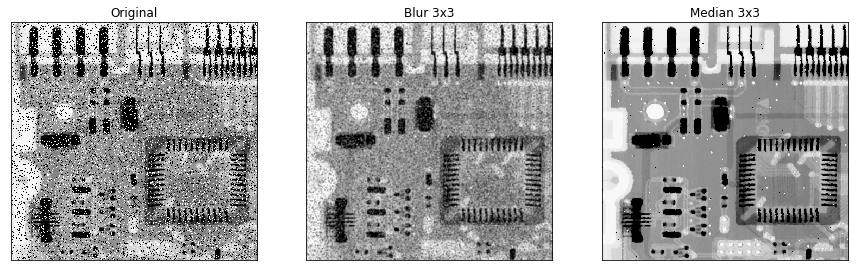

In [11]:
plt.figure(figsize=(15,15))
plt.subplot(131), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(blur3, cmap='gray'), plt.title('Blur 3x3')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(median3, cmap='gray'), plt.title('Median 3x3')
plt.xticks([]), plt.yticks([])
plt.show()

<h3>4. Bilateral Filtering</h3>
<b>cv2.bilateralFilter()</b> is highly effective in noise removal while keeping edges sharp. But the operation is slower compared to other filters. We already saw that gaussian filter takes the a neighbourhood around the pixel and find its gaussian weighted average. This gaussian filter is a function of space alone, that is, nearby pixels are considered while filtering. It doesn't consider whether pixels have almost same intensity. It doesn't consider whether pixel is an edge pixel or not. So it blurs the edges also, which we don't want to do.

Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.

In [12]:
img = cv2.imread("./examples/Bilateral.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [13]:
blur = cv2.bilateralFilter(img_rgb,9,75,75)

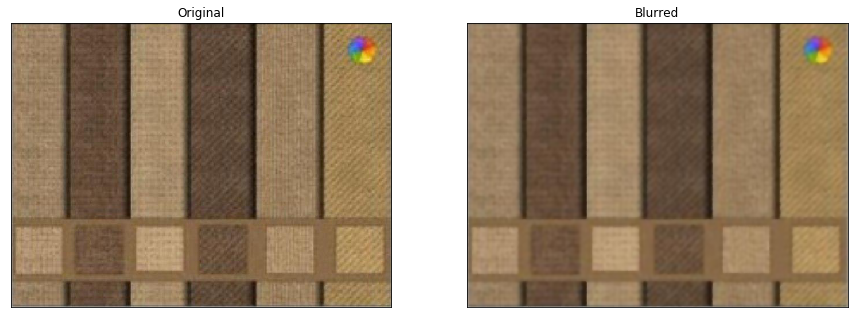

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img_rgb),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

<h2>Image sharpening</h2>

In [15]:
img = cv2.imread("./examples/Fig0338a.tif")

<h4>Create our shapening kernel, it must equal to one eventually</h4>

In [16]:
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

<h4>Applying the sharpening kernel to the input image & displaying it</h4>

In [17]:
sharpened = cv2.filter2D(img, -1, kernel_sharpening)

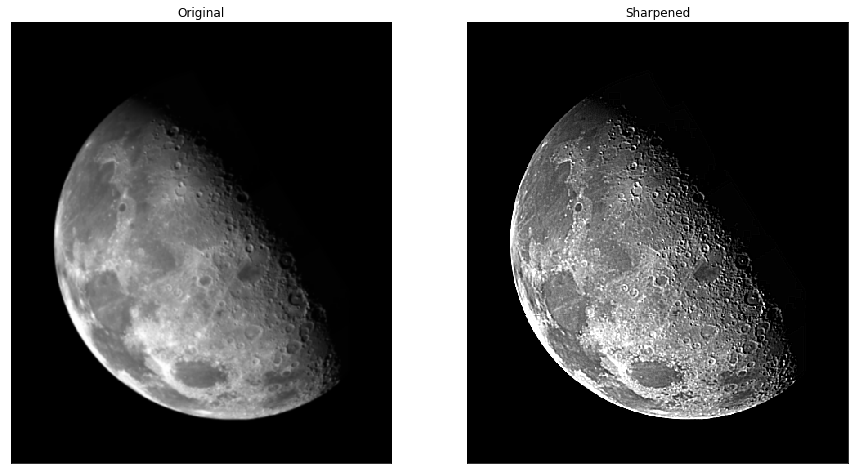

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sharpened),plt.title('Sharpened')
plt.xticks([]), plt.yticks([])
plt.show()